# Introduction to Data Analysis

## Experiment on COMPAS Dataset
### Author: Archit YADAV

## 0. Download the data

We first need to load the data from the ProPublica repo:
https://github.com/propublica/compas-analysis

In [1]:
import urllib
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn import feature_extraction
from sklearn import preprocessing
from random import seed, shuffle


SEED = 1234
seed(SEED)
np.random.seed(SEED)

def check_data_file(fname):
    
    print("'%s' not found! Downloading from GitHub...",fname)
    addr = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
    response = urllib.request.urlopen(addr)
    data = response.read()
    fileOut = open(fname, "wb")
    fileOut.write(data)
    fileOut.close()
    #print("'%s' download and saved locally..",fname)
    
    
COMPAS_INPUT_FILE = "compas-scores-two-years.csv"
check_data_file(COMPAS_INPUT_FILE)  

'%s' not found! Downloading from GitHub... compas-scores-two-years.csv


In [3]:
dataObj = pd.read_csv("compas-scores-two-years.csv")

print("Coloumns: ", len(dataObj.columns))
print("Rows: ", len(dataObj))

print("(Rows, Cols) : ", dataObj.shape)

# print("First 5 entries: ", dataObj.head())

print("All the headers of the dataset:\n ", dataObj.keys())


Coloumns:  53
Rows:  7214
(Rows, Cols) :  (7214, 53)
All the headers of the dataset:
  Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'tw

# 1. Dataset Exploration

## 1.1 Basic analysis of demographics

- What are the different races present in the dataset? 

- What is the number of people by age category?

- What is the number of people by race?

- What is the number of people by COMPAS score (decile_score)?

- What is the number of people by COMPAS risk category (score_text)?

In [4]:
# Printing all the unique values of possible races.
print("Here are all the unique races in the dataset: \n")
print(dataObj["race"].unique())

print("\n")

# Printing number of people by age range.
print("Age category and their count: \n")
print( dataObj["age_cat"].value_counts() )

print("\n")

# Printing number of people by race.
print("Race category and their count: \n")
print( dataObj["race"].value_counts() )

print("\n")

# Printing number of people by decile_score.
print("Number of people by decile score: \n")
print( dataObj["decile_score"].value_counts() )

print("\n")


# Printing number of people by decile_score category.
print("Number of people by decile_score category: \n")
print( dataObj["score_text"].value_counts() )

Here are all the unique races in the dataset: 

['Other' 'African-American' 'Caucasian' 'Hispanic' 'Native American'
 'Asian']


Age category and their count: 

25 - 45            4109
Greater than 45    1576
Less than 25       1529
Name: age_cat, dtype: int64


Race category and their count: 

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64


Number of people by decile score: 

1     1440
2      941
4      769
3      747
5      681
6      641
7      592
8      512
9      508
10     383
Name: decile_score, dtype: int64


Number of people by decile_score category: 

Low       3897
Medium    1914
High      1403
Name: score_text, dtype: int64


## 1.2 Basic investigations of gender and race bias in COMPAS scores

decile_score -- is the score given by the COMPAS algorithm that estimates the risk to re-offend.

two_years_recid -- is the ground truth data on whether the offender recidivated or not

- What is the mean COMPAS score (decile_score) per race and gender? 

- What is the distribution (histogram) of decile_score per race and gender? 

The two_year_recid field records whether or not each person was re-arrested for a violent offense within two years, which is what COMPAS is trying to predict.

- How many people were re-arrested? 

- Compute the recidivism (i.e., people that got re-arrested) rates by race and gender


### COMPAS Score per race

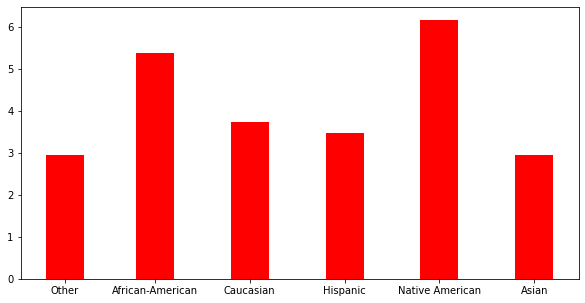

In [26]:
# df2 = dataObj[dataObj["race"] == "Caucasian"]
raceObj = dataObj.groupby("race")
raceObj.get_group("Caucasian")["decile_score"].mean()

tick_label = dataObj["race"].unique()

fig= plt.figure(figsize=(10,5))

# x-coordinates of left sides of bars  
left = [1, 20, 40, 60, 80, 100]

# heights of bars 
height = [raceObj.get_group("Other")["decile_score"].mean(), raceObj.get_group("African-American")["decile_score"].mean(), raceObj.get_group("Caucasian")["decile_score"].mean(), raceObj.get_group("Hispanic")["decile_score"].mean(), raceObj.get_group("Native American")["decile_score"].mean(), raceObj.get_group("Asian")["decile_score"].mean()] 
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 8, color = ['red']) 

plt.savefig('AvgDecilePerRace', dpi = 800)

### COMPAS Score per gender

[4.5904794638254, 4.172043010752688]


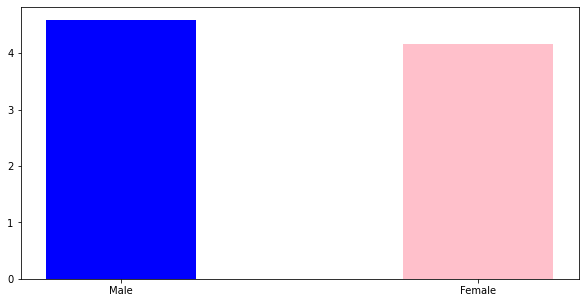

In [28]:
# df2 = dataObj[dataObj["race"] == "Caucasian"]
raceObj = dataObj.groupby("sex")

tick_label = dataObj["sex"].unique()

fig= plt.figure(figsize=(10,5))

# x-coordinates of left sides of bars  
left = [1, 20]

# heights of bars 
height = [raceObj.get_group("Male")["decile_score"].mean(), raceObj.get_group("Female")["decile_score"].mean()] 
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 8, color = ['blue', 'pink']) 

plt.savefig('AvgDecilePerGender.png', dpi = 800)
print(height)

### 2 Year Recid Count

0    3963
1    3251
Name: two_year_recid, dtype: int64


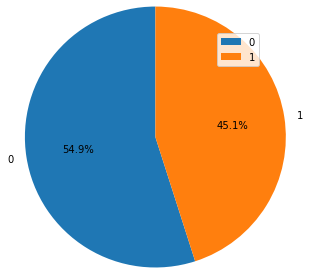

In [30]:
# Printing number of people by decile_score category.
print( dataObj["two_year_recid"].value_counts() )

twoYearRecidObj = dataObj.groupby("two_year_recid")
slices = [3963, 3251]
# defining labels 
activities = ['0', '1'] 

plt.pie(slices, labels=activities, startangle=90, radius=1.5, autopct = '%1.1f%%')
# plotting legend 
plt.legend() 

plt.savefig('decilePieTotal', dpi = 800)

* About `3251` people `(45.1%)` people were re-arrested for violent offense within 2 years after getting out.
 

### Histogram Plots

* African-American Deciel Scores

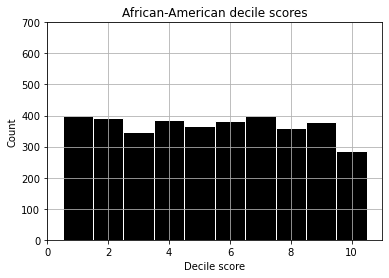

In [32]:
df = pd.DataFrame(dataObj)

black_df = df[df['race'] == 'African-American']
black_df['decile_score'].hist(color='black', edgecolor='white', bins=np.arange(13)-0.5)
plt.ylim([0,700])
plt.xlim([0,11])
plt.title('African-American decile scores')
plt.xlabel('Decile score')
plt.ylabel('Count')
plt.savefig('African-American_Decile_Histo', dpi = 800)

* Caucasian Decile Scores

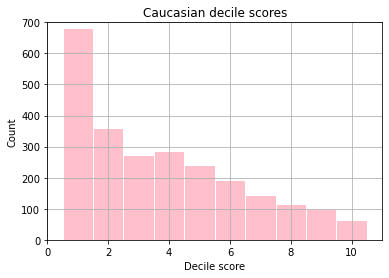

In [33]:
df = pd.DataFrame(dataObj)

black_df = df[df['race'] == 'Caucasian']
black_df['decile_score'].hist(color='pink', edgecolor='white', bins=np.arange(13)-0.5)
plt.ylim([0,700])
plt.xlim([0,11])
plt.title('Caucasian decile scores')
plt.xlabel('Decile score')
plt.ylabel('Count')

plt.savefig('Caucasian_Decile_Histo', dpi = 800)

* Hispanic Decile Scores

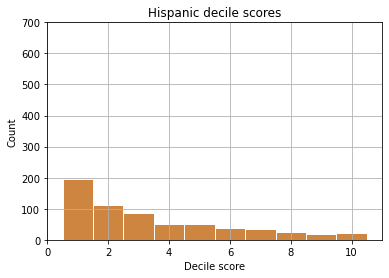

In [34]:
df = pd.DataFrame(dataObj)

black_df = df[df['race'] == 'Hispanic']
black_df['decile_score'].hist(color='peru', edgecolor='white', bins=np.arange(13)-0.5)
plt.ylim([0,700])
plt.xlim([0,11])
plt.title('Hispanic decile scores')
plt.xlabel('Decile score')
plt.ylabel('Count')

plt.savefig('Hispanic_Decile_Histo', dpi = 800)

* Asian Decile Scores

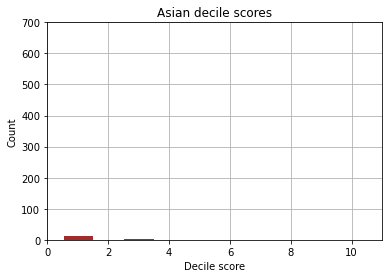

In [35]:
df = pd.DataFrame(dataObj)

black_df = df[df['race'] == 'Asian']
black_df['decile_score'].hist(color='brown', edgecolor='white', bins=np.arange(13)-0.5)
plt.ylim([0,700])
plt.xlim([0,11])
plt.title('Asian decile scores')
plt.xlabel('Decile score')
plt.ylabel('Count')

plt.savefig('Asian_Decile_Histo', dpi = 800)

### Recedivism rates by gender and race

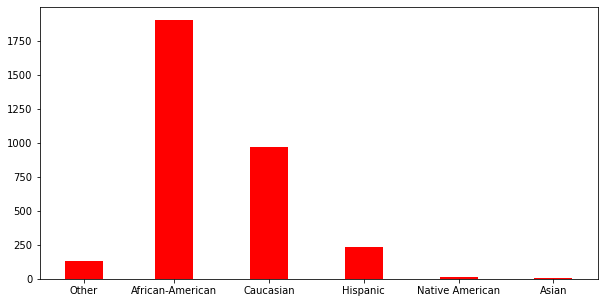

In [37]:
# df2 = dataObj[dataObj["race"] == "Caucasian"]
raceObj = dataObj.groupby("race")
tick_label = dataObj["race"].unique()

fig= plt.figure(figsize=(10,5))

# x-coordinates of left sides of bars  
left = [1, 20, 40, 60, 80, 100]

# heights of bars 
height = [raceObj.get_group("Other")["two_year_recid"].value_counts().get(1), raceObj.get_group("African-American")["two_year_recid"].value_counts().get(1), raceObj.get_group("Caucasian")["two_year_recid"].value_counts().get(1), raceObj.get_group("Hispanic")["two_year_recid"].value_counts().get(1), raceObj.get_group("Native American")["two_year_recid"].value_counts().get(1), raceObj.get_group("Asian")["two_year_recid"].value_counts().get(1)] 
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 8, color = ['red']) 

plt.savefig('2YearRecid_RaceCount', dpi = 800)

In [39]:
raceObj = dataObj.groupby("sex")
tick_label = dataObj["sex"].unique()

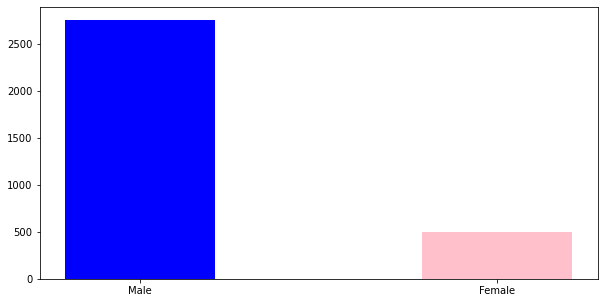

In [40]:
fig= plt.figure(figsize=(10,5))

# x-coordinates of left sides of bars  
left = [1, 20]

# heights of bars 
height = [raceObj.get_group("Male")["two_year_recid"].value_counts().get(1), raceObj.get_group("Female")["two_year_recid"].value_counts().get(1)] 
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 8, color = ['blue', 'pink'])

plt.savefig('2YearRecid_sex', dpi = 800)

# 2. Standard Classifier

## 2.1 Logistic Regression

* `dataObj` consists the the read CSV file 
through Pandas variable `pd`

* Variable to predict - `two_year_recid`
* Variable used as input - `v_decile_score`, `decile_score`, `race` and `sex`
* We know `race` is also an important criterion 

In [44]:
# dataObj consists the the read CSV file 
# through Pandas variable pd

# To predict variable - decile_score

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
dataObjLR = dataObj

dataObjLR.columns.values

df = pd.DataFrame(dataObjLR)

#print(dropped)

# Mapping string race to integer values
df.replace(['Other', 'African-American', 'Caucasian', 'Hispanic', 'Native American', 'Asian'], [0, 1, 2, 3, 4, 5], inplace=True)
df.replace(['Male', 'Female'], [0, 1], inplace=True)

#print(df.sex)

y = df[["two_year_recid"]]
X = df[["v_decile_score", "decile_score", "race"]]

print("Output variable: ", y.columns.values)
print("Input: variable: ", X.columns.values)

Output variable:  ['two_year_recid']
Input: variable:  ['v_decile_score' 'decile_score' 'race']


In [45]:
# Training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression: 0.66


c:\users\archi\pycharmprojects\compasproject\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



* ROC Curve

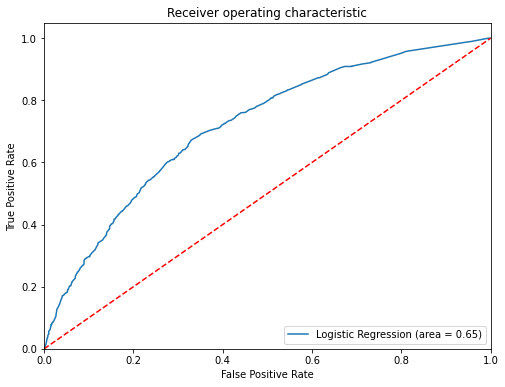

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(8.00,6.00))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', dpi = 800)
plt.show()

## 2.2 KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 2)

# Fit the classifier to the data
knn.fit(X_train,y_train)

#show predictions on the test data
knn.predict(X_test)

c:\users\archi\pycharmprojects\compasproject\venv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


0.6036951501154735

* Accuracy Meterics

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

* ROC Curve

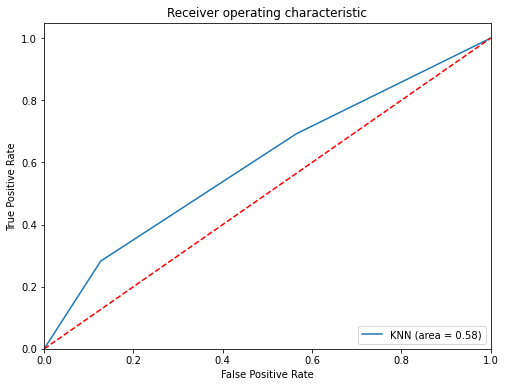

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure(figsize=(8.00,6.00))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', dpi = 800)
plt.show()


## 2.3 MLP

In [120]:
from sklearn.neural_network import MLPClassifier
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

#Fitting the training data to the network
classifier.fit(X_train, y_train)

#Predicting y for X_val
y_pred = classifier.predict(X_test)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements



#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

c:\users\archi\pycharmprojects\compasproject\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of MLPClassifier :  0.6706697459584295


* ROC Curve

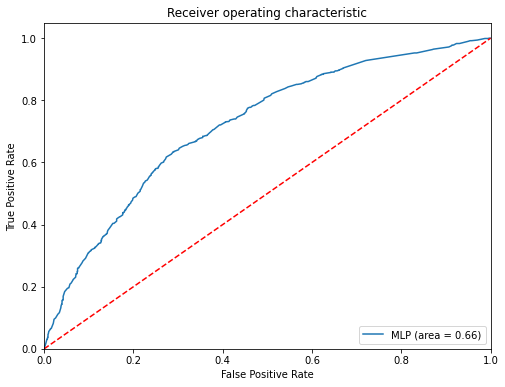

In [124]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
classifier_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(8.00,6.00))
plt.plot(fpr, tpr, label='MLP (area = %0.2f)' % classifier_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', dpi = 800)
plt.show()

#print("FPR: ",fpr)
#print("TPR: ", tpr)
#print("Threashold: ", thresholds)

# Summary of classifiers results 


| Experiments |      Classifier     |                           X                           |         y        | Accuracy |
|:-----------:|:-------------------:|:-----------------------------------------------------:|:----------------:|:--------:|
|      #1     | Logistic Regression | `v_decile_score`                                      | `two_year_recid` |   0.65   |
|      #2     | Logistic Regression | `v_decile_score`<br>`decile_score`                    | `two_year_recid` |   0.66   |
|      #3     | Logistic Regression | `v_decile_score`<br>`decile_score`<br>`race`          | `two_year_recid` |   0.66   |
|      #4     | Logistic Regression | `v_decile_score`<br>`decile_score`<br>`race`<br>`sex` | `two_year_recid` |   0.66   |
|      #5     |         KNN         | `v_decile_score`<br>`decile_score`<br>`race`<br>`sex` | `two_year_recid` |   0.603  |
|      #6     |         MLP         | `v_decile_score`<br>`decile_score`<br>`race`<br>`sex` | `two_year_recid` |   0.67   |